                      Open   High    Low  Close    Volume
Date                                                     
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438


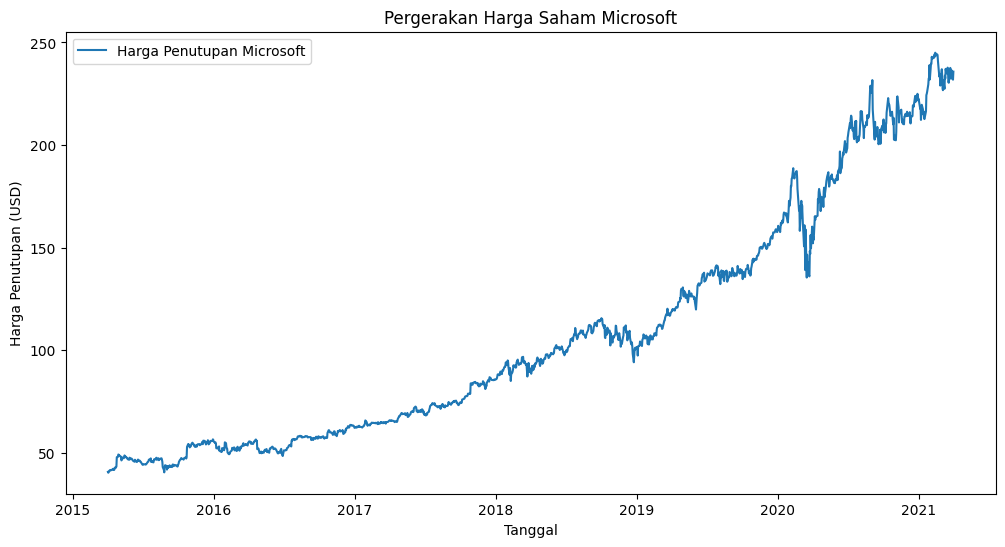

In [1]:
# === Bagian 1: Import Library dan Load Dataset ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math

# Muat dataset
df = pd.read_csv("Microsoft_Stock.csv")

# Konversi kolom tanggal
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Tampilkan beberapa data awal
print(df.head())

# Plot harga penutupan (Close)
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Harga Penutupan Microsoft')
plt.title('Pergerakan Harga Saham Microsoft')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.show()


In [2]:
# === Bagian 2: Normalisasi Data ===

data = df.filter(['Close'])
dataset = data.values  # ambil kolom close sebagai numpy array

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Cek hasil normalisasi
print("Contoh hasil normalisasi:\n", scaled_data[:5])


Contoh hasil normalisasi:
 [[0.00210064]
 [0.        ]
 [0.00615535]
 [0.00605765]
 [0.00552027]]


In [3]:
# === Bagian 3: Membuat Data Sekuensial (X, y) ===

training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0:int(training_data_len), :]

X_train = []
y_train = []

timesteps = 60

for i in range(timesteps, len(train_data)):
    X_train.append(train_data[i - timesteps:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape ke 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)


Shape X_train: (1149, 60, 1)
Shape y_train: (1149,)


In [4]:
# === Bagian 4: Membangun Model LSTM ===

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, batch_size=32, epochs=25)


Epoch 1/25


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0242
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.8987e-04
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.5576e-04
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.1567e-04
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.0623e-04
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.1899e-04
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.0092e-04
Epoch 8/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.9267e-04
Epoch 9/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.2745e-04
Epoch 10/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9183e-04
Epoch 11/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.6417e-04
Epoch 12/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.4647e-04
Epoch 13/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9802e-04
Epoch 14/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.5598e-04
Epoch 15/25
36/36 ━━━━━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Root Mean Squared Error (RMSE): 9.207310315820555


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8704\377864269.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


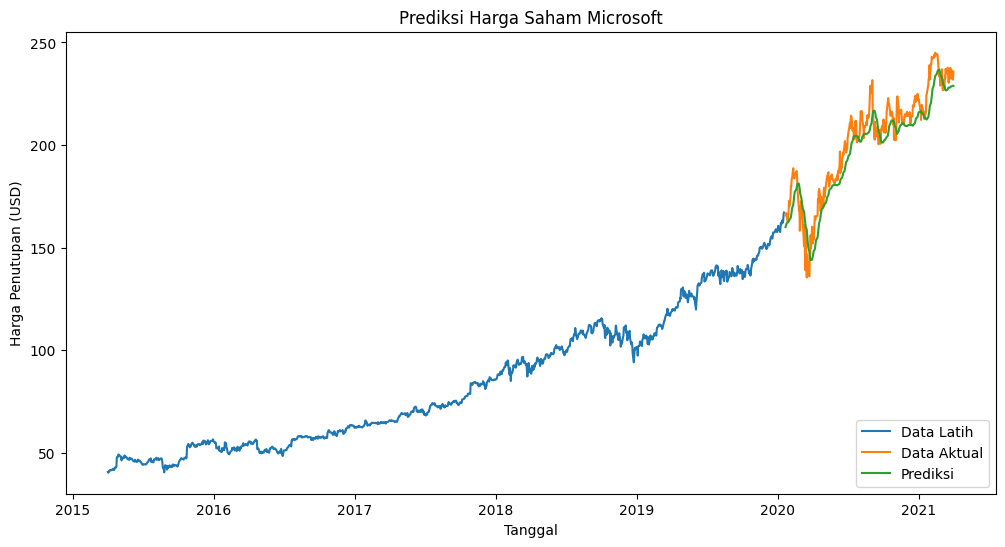

In [5]:
# === Bagian 5: Evaluasi Model ===

# Buat data uji (20% data terakhir)
test_data = scaled_data[training_data_len - timesteps:, :]
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(timesteps, len(test_data)):
    X_test.append(test_data[i - timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prediksi
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Hitung RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualisasi hasil
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('Prediksi Harga Saham Microsoft')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.plot(train['Close'], label='Data Latih')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Data Latih', 'Data Aktual', 'Prediksi'], loc='lower right')
plt.show()


In [6]:
# === Bagian 6: Simpan Model & Scaler ===
model.save("model_lstm_microsoft.h5")

import joblib
joblib.dump(scaler, "scaler_microsoft.pkl")
print("Model dan scaler berhasil disimpan!")


Model dan scaler berhasil disimpan!
